# Creating a Story Map Using Leaflet and CSVs

---

**Objectives:**

By the end of this exericse, you should be able to:

* Create an HTML page
* Host an interactive map (Leaflet) on GitHub Pages
* Create a storymap using Python, Leaflet, and CSV files

---

In this exercise, you will learn how to present spatial data in an interactive narrative similar to [ESRI StoryMaps](https://storymaps-classic.arcgis.com/en/gallery/#s=0) using open source products. You will learn how to host a live version of an HTML webpage on GitHub Pages.

<!-- If you double-click on the `raleigh.html` file in your folder, a map will open in your web browser. Next, let's open the `raleigh.html` file in **VS Code**. -->

This code is adapted from the `index.html` file from [this GitHub repository](https://github.com/HandsOnDataViz/leaflet-map-simple).

This exercise is an adaptation of the ["Leaflet Storymaps with Google Sheets" tutorial](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html) from the *Hands-On Data Visualization* book by Jack Dougherty & Ilya Ilyankou. The open-acess web edition of the book can be found [here](https://handsondataviz.org/).

Dougherty and Ilyankou developed Leaflet Storymaps with Google Sheets to create an open-source, easily migratable, story map tool. In this exercise, we are adapting their work with Google Sheets into using Python to create and edit CSVs to create the open-source storymap.

### Host a Live Leaflet Map on GitHub Pages

In order to host your storymap on the internet, you need to create a GitHub repository for this project. The best way to do this is to **fork** the leaflet-storymap-nr491 repo from [this repo](https://github.com/mdgaines/leaflet-storymap-nr491) on my (Mollie Gaines') GitHub.

Go to Settings > Pages and set Branch to `main` and save.

Edit your README.md to have the link to your new repo.

### Leaflet Storymap with CSVs

We are now going to start working on our Leaflet Storymap by building several `pandas dataframes` which we can save as a CSVs.

Our storymap will have a scrolling narrative that follows points along our map. You will learn how to add images, audio and video files, and different map backgrounds. 

We will build an in-class storymap to looking at different colleges and universities in Wake County.

In [24]:
import pandas as pd
import geopandas as gpd
import os
import folium
import csv

First, we will create an `Options.csv` file and save it in our `csv/` directory. We will create this CSV to look like the **Options** tab in the Google Sheet from the HODV exercise.

![GS_Options](./imgs/gs_options.PNG)

In [25]:
# Create Options.csv file
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'Air Quality in Sequoia National Park, California', '']
subtitle = ['Storymap Subtitle', \
    "GIS 495 Final Project<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/nps-logo.png', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Lena Miller','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/lenamillr/GIS495_FinalProject.git',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

**NOTE:** you can have several different basemap tiles that will appear in the background. 
The options we will look at are:

![Basemaps](./imgs/gs_basemap_tiles.PNG)

We can also choose where on our map we put our zoom controls. The options are:

![zoom](./imgs/gs_zoom.PNG)

Now, we'll write our first CSV.

In [26]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


Now that we've saved our CSV, we will read it in as a Pandas DataFrame and make some edits so it is personalized for us.

**Note:** We could have written our original CSV with all the information we wanted, however now we can practice making edits.

In [27]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options.csv', index_col=0)
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,"Air Quality in Sequoia National Park, California",NaN
Storymap Subtitle,GIS 495 Final Project<br><small>Scroll down<i ...,"Add your subtitle, or delete that portion"
Storymap Logo,media/nps-logo.png,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,NaN,NaN


In [28]:
# we will index to the specific entry we want to edit using df[col][row] indexing.
# we read in the df with the first column as our index to make this easier for ourselves

# here, we are changing the background color of our narative bar
#options_df['Customize']['Narrative Background Color'] = 'lightgray'

#options_df

In [29]:
# Next, make edits to the Author Name and Author Github Repo Link so it has your information
#options_df['Customize']['Author Name'] = 'Lena Miller'

#options_df['Customize']['Author Github Repo Link'] = 'https://github.com/lenamillr/leaflet_storymap_2023.git'

#options_df['Customize']['Basemap Tiles'] = 'StatemenTerrain'

# save your options df as Options.csv
#options_df.to_csv('./csv/Options.csv')

#options_df

Now let's checkout what our index.html file looks like so far.

### Chapters

We will add content to our map by creating a `Chapters.csv`.

However, first we will look through our data to get the information we are interested in.

Now, let's read in some of our spatial data.

In [30]:
# read in national parks boundaries shapefile
NPS_boundaries = gpd.read_file('./data/NPS_Boundary/nps_boundary.shp')

# print CRS
print(NPS_boundaries.crs)


EPSG:3857


In [31]:
# select just Sequoia National Park
sequoia_boundary = NPS_boundaries[NPS_boundaries['UNIT_NAME'] == 'Sequoia National Park']

We can use the `folium` package to see what our Leaflet map will look like.

In [32]:
# Create a Map instance centered on Sequoia National Park
m = folium.Map(location=[36.486366, -118.565750], zoom_start=14, control_scale=True)
m

<Axes: >

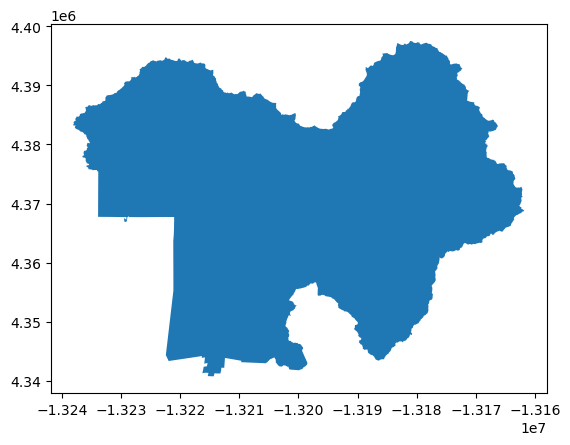

In [33]:
sequoia_boundary.plot()

In [34]:
# Show the colleges on the map

# Create college points on top of the map
for idx, row in nc_colleges_wgs84.iterrows():
    # Get lat and lon of points
    lon = row['geometry'].x
    lat = row['geometry'].y

    # Get college information
    college_name = row['NAME']

    #Add markers to the map
    folium.Marker([lat,lon], popup=college_name).add_to(m)

m

NameError: name 'nc_colleges_wgs84' is not defined

Let's parse this data down to schools in Raleigh, and remove some of the information we are not interested in.

In [ ]:
nc_coll_raleigh = nc_colleges_wgs84[nc_colleges_wgs84['CITY'] == 'RALEIGH'].drop(['OBJECTID', \
    'METLNKID', 'PHONE', 'SECCLASS', 'ST_VENDOR', 'ST_VERSION', 'ADDRESS2', 'EMERGTITLE', 'EMERGPHONE',
    'EMERGEXT', 'DIRECTIONS', 'CONTDATE', 'CONTHOW', 'GEOPREC', 'QC_QA', 'onemapSDEA', \
    'GEOHOW', 'GEOLINKID', 'GEODATE', 'PHONELOC'], axis=1)
nc_coll_raleigh

,ID,FEATTYPE,NAME,ADDRESS,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,NAICSCODE,NAICSDESCR,X,Y,DEGREE,ENROLL,geometry,geoid
0,10275649,POINT,SCHOOL OF COMMUNICATION ARTS,3000 WAKEFIELD CROSSING DRIVE,RALEIGH,NC,27614,NaN,WAKE,37183,611610,FINE ARTS SCHOOLS (EXCEPT ACADEMIC),-78.556242,35.942785,ASSOCIATE'S DEGREE,298,POINT (-78.55624 35.94278),0
19,10274284,POINT,WAKE TECHNICAL COMMUNITY COLLEGE,9101 FAYETTEVILLE ROAD,RALEIGH,NC,27603,5655,WAKE,37183,61151,TECHNICAL AND TRADE SCHOOLS,-78.706852,35.650636,ASSOCIATE'S DEGREE,11832,POINT (-78.70685 35.65063),19
22,10274261,POINT,PEACE COLLEGE,15 E PEACE ST,RALEIGH,NC,27604,1176,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.637376,35.788240,BACHELOR'S DEGREE,668,POINT (-78.63737 35.78824),22
32,10272064,POINT,SHAW UNIVERSITY,118 E SOUTH ST,RALEIGH,NC,27601,2341,WAKE,37183,611310,UNIVERSITIES,-78.637986,35.771817,MASTER'S DEGREE,2762,POINT (-78.63798 35.77182),32
49,10275987,POINT,UNIVERSITY OF PHOENIX-RALEIGH CAMPUS,5511 CAPITAL CENTER DRIVE STE. 380,RALEIGH,NC,27606,4168,WAKE,37183,611310,UNIVERSITIES,-78.729081,35.767244,MASTER'S DEGREE,221,POINT (-78.72908 35.76724),49
57,10274245,POINT,MEREDITH COLLEGE,3800 HILLSBOROUGH ST,RALEIGH,NC,27607,5237,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.688041,35.794525,MASTER'S DEGREE,2168,POINT (-78.68804 35.79452),57
65,10272187,POINT,SAINT AUGUSTINES COLLEGE,1315 OAKWOOD AVENUE,RALEIGH,NC,27610,2247,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.620682,35.784495,BACHELOR'S DEGREE,1163,POINT (-78.62068 35.78449),65
97,10274257,POINT,NORTH CAROLINA STATE UNIVERSITY AT RALEIGH,2200 HILLSBOROUGH STREET,RALEIGH,NC,27695,0001,WAKE,37183,611310,UNIVERSITIES,-78.664483,35.786472,DOCTOR'S DEGREE,30148,POINT (-78.66448 35.78647),97


We will build our storymap with each of these schools as a chapter.

Now, let's make our `Chapters.csv` with specific column headers (**do not change the headers, they work with the background Leaflet code**) and a row for each of our chapters.

In [ ]:
header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']

# add a column of founding date to our nc_coll_raleigh df
nc_coll_raleigh['FOUNDED'] = None
nc_coll_raleigh

,ID,FEATTYPE,NAME,ADDRESS,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,NAICSCODE,NAICSDESCR,X,Y,DEGREE,ENROLL,geometry,geoid,FOUNDED
0,10275649,POINT,SCHOOL OF COMMUNICATION ARTS,3000 WAKEFIELD CROSSING DRIVE,RALEIGH,NC,27614,NaN,WAKE,37183,611610,FINE ARTS SCHOOLS (EXCEPT ACADEMIC),-78.556242,35.942785,ASSOCIATE'S DEGREE,298,POINT (-78.55624 35.94278),0,None
19,10274284,POINT,WAKE TECHNICAL COMMUNITY COLLEGE,9101 FAYETTEVILLE ROAD,RALEIGH,NC,27603,5655,WAKE,37183,61151,TECHNICAL AND TRADE SCHOOLS,-78.706852,35.650636,ASSOCIATE'S DEGREE,11832,POINT (-78.70685 35.65063),19,None
22,10274261,POINT,PEACE COLLEGE,15 E PEACE ST,RALEIGH,NC,27604,1176,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.637376,35.788240,BACHELOR'S DEGREE,668,POINT (-78.63737 35.78824),22,None
32,10272064,POINT,SHAW UNIVERSITY,118 E SOUTH ST,RALEIGH,NC,27601,2341,WAKE,37183,611310,UNIVERSITIES,-78.637986,35.771817,MASTER'S DEGREE,2762,POINT (-78.63798 35.77182),32,None
49,10275987,POINT,UNIVERSITY OF PHOENIX-RALEIGH CAMPUS,5511 CAPITAL CENTER DRIVE STE. 380,RALEIGH,NC,27606,4168,WAKE,37183,611310,UNIVERSITIES,-78.729081,35.767244,MASTER'S DEGREE,221,POINT (-78.72908 35.76724),49,None
57,10274245,POINT,MEREDITH COLLEGE,3800 HILLSBOROUGH ST,RALEIGH,NC,27607,5237,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.688041,35.794525,MASTER'S DEGREE,2168,POINT (-78.68804 35.79452),57,None
65,10272187,POINT,SAINT AUGUSTINES COLLEGE,1315 OAKWOOD AVENUE,RALEIGH,NC,27610,2247,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.620682,35.784495,BACHELOR'S DEGREE,1163,POINT (-78.62068 35.78449),65,None
97,10274257,POINT,NORTH CAROLINA STATE UNIVERSITY AT RALEIGH,2200 HILLSBOROUGH STREET,RALEIGH,NC,27695,0001,WAKE,37183,611310,UNIVERSITIES,-78.664483,35.786472,DOCTOR'S DEGREE,30148,POINT (-78.66448 35.78647),97,None


In [ ]:
nc_coll_raleigh.loc[[22], ['FOUNDED']] = 1857 # Peace College
nc_coll_raleigh.loc[[32], ['FOUNDED']] = 1865 # Shaw University
nc_coll_raleigh.loc[[65], ['FOUNDED']] = 1867 # St. Augustune's University
nc_coll_raleigh.loc[[97], ['FOUNDED']] = 1887 # NC State University
nc_coll_raleigh.loc[[57], ['FOUNDED']] = 1891 # Meredith College
nc_coll_raleigh.loc[[19], ['FOUNDED']] = 1963 # Wake Tech
nc_coll_raleigh.loc[[49], ['FOUNDED']] = 1976 # University of Phoenix
nc_coll_raleigh.loc[[0], ['FOUNDED']] = 1992 # School of communication arts

nc_coll_raleigh = nc_coll_raleigh.sort_values(by='FOUNDED')
nc_coll_raleigh

,ID,FEATTYPE,NAME,ADDRESS,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,NAICSCODE,NAICSDESCR,X,Y,DEGREE,ENROLL,geometry,geoid,FOUNDED
22,10274261,POINT,PEACE COLLEGE,15 E PEACE ST,RALEIGH,NC,27604,1176,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.637376,35.788240,BACHELOR'S DEGREE,668,POINT (-78.63737 35.78824),22,1857
32,10272064,POINT,SHAW UNIVERSITY,118 E SOUTH ST,RALEIGH,NC,27601,2341,WAKE,37183,611310,UNIVERSITIES,-78.637986,35.771817,MASTER'S DEGREE,2762,POINT (-78.63798 35.77182),32,1865
65,10272187,POINT,SAINT AUGUSTINES COLLEGE,1315 OAKWOOD AVENUE,RALEIGH,NC,27610,2247,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.620682,35.784495,BACHELOR'S DEGREE,1163,POINT (-78.62068 35.78449),65,1867
97,10274257,POINT,NORTH CAROLINA STATE UNIVERSITY AT RALEIGH,2200 HILLSBOROUGH STREET,RALEIGH,NC,27695,0001,WAKE,37183,611310,UNIVERSITIES,-78.664483,35.786472,DOCTOR'S DEGREE,30148,POINT (-78.66448 35.78647),97,1887
57,10274245,POINT,MEREDITH COLLEGE,3800 HILLSBOROUGH ST,RALEIGH,NC,27607,5237,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.688041,35.794525,MASTER'S DEGREE,2168,POINT (-78.68804 35.79452),57,1891
19,10274284,POINT,WAKE TECHNICAL COMMUNITY COLLEGE,9101 FAYETTEVILLE ROAD,RALEIGH,NC,27603,5655,WAKE,37183,61151,TECHNICAL AND TRADE SCHOOLS,-78.706852,35.650636,ASSOCIATE'S DEGREE,11832,POINT (-78.70685 35.65063),19,1963
49,10275987,POINT,UNIVERSITY OF PHOENIX-RALEIGH CAMPUS,5511 CAPITAL CENTER DRIVE STE. 380,RALEIGH,NC,27606,4168,WAKE,37183,611310,UNIVERSITIES,-78.729081,35.767244,MASTER'S DEGREE,221,POINT (-78.72908 35.76724),49,1976
0,10275649,POINT,SCHOOL OF COMMUNICATION ARTS,3000 WAKEFIELD CROSSING DRIVE,RALEIGH,NC,27614,NaN,WAKE,37183,611610,FINE ARTS SCHOOLS (EXCEPT ACADEMIC),-78.556242,35.942785,ASSOCIATE'S DEGREE,298,POINT (-78.55624 35.94278),0,1992


In [ ]:
col_names = [name.title() for name in nc_coll_raleigh.NAME]
col_names

['Peace College',
 'Shaw University',
 'Saint Augustines College',
 'North Carolina State University At Raleigh',
 'Meredith College',
 'Wake Technical Community College',
 'University Of Phoenix-Raleigh Campus',
 'School Of Communication Arts']

In [ ]:
# Create a new Chapters.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Chapters.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(['Overview of Raleigh'])

    for name in col_names:
        writer.writerow([name])

In [ ]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Peace College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Saint Augustines College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Meredith College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Wake Technical Community College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,University Of Phoenix-Raleigh Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,School Of Communication Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our first chapter will give a brief overview of Raleigh. We will include a fun skyline image with a link to where we got the image (the Raleigh government webpage). Our map will show a historical, georeferenced map of the Raleigh City Plan from 1834 along with blue markers for each of the 8 schools we will look at for chapters.

To include images in our narative, we need to have them downloaded to our `media` directory.

In [ ]:
chapter_df.columns

In [ ]:
# path to the image used for this chapter
chapter_df.loc[[0], ['Media Link']] = 'media/visit_raleigh.jpg'
# Name of image source
chapter_df.loc[[0], ['Media Credit']] = 'Source: Raleigh Government'
# Link to image
chapter_df.loc[[0], ['Media Credit Link']] = 'https://raleighnc.gov/'
# Narrative description
chapter_df.loc[[0], ['Description']] = 'Before European colonization, the Raleigh area was home to indigenous \
    tribes including the Tuscarora and Occaneechi. Sir Walter Raleigh, among others, funded a group of colonists \
    to establish the <em>Cittie of Raleigh</em>. These colonists landed on Roanoke Island in <b>1587</b> and \
    later became known as the "Lost Colony" after the settlement was found abandonded in 1590. In <b>1770</b> \
    the General Assembly created Wake County. In <b>1792</b>, Raleigh was founded as the state capital of North Carolina.'
# Zoom level
chapter_df.loc[[0], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[0], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[0], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[0], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[0], ['Latitude']] = 35.7796
chapter_df.loc[[0], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[0], ['Overlay']] = 'https://mapwarper.net/maps/tile/51816/{z}/{x}/{y}.png'
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[0], ['Overlay Transparency']] = 0.9


In [ ]:
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,media/visit_raleigh.jpg,Source: Raleigh Government,https://raleighnc.gov/,"Before European colonization, the Raleigh area...",15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,https://mapwarper.net/maps/tile/51816/{z}/{x}/...,0.9,NaN,NaN
1,Peace College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Saint Augustines College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Meredith College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Wake Technical Community College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,University Of Phoenix-Raleigh Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,School Of Communication Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nc_coll_raleigh = nc_coll_raleigh.reset_index()
nc_coll_raleigh.head()

,index,ID,FEATTYPE,NAME,ADDRESS,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,NAICSCODE,NAICSDESCR,X,Y,DEGREE,ENROLL,geometry,geoid,FOUNDED
0,22,10274261,POINT,PEACE COLLEGE,15 E PEACE ST,RALEIGH,NC,27604,1176,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.637376,35.788240,BACHELOR'S DEGREE,668,POINT (-78.63737 35.78824),22,1857
1,32,10272064,POINT,SHAW UNIVERSITY,118 E SOUTH ST,RALEIGH,NC,27601,2341,WAKE,37183,611310,UNIVERSITIES,-78.637986,35.771817,MASTER'S DEGREE,2762,POINT (-78.63798 35.77182),32,1865
2,65,10272187,POINT,SAINT AUGUSTINES COLLEGE,1315 OAKWOOD AVENUE,RALEIGH,NC,27610,2247,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.620682,35.784495,BACHELOR'S DEGREE,1163,POINT (-78.62068 35.78449),65,1867
3,97,10274257,POINT,NORTH CAROLINA STATE UNIVERSITY AT RALEIGH,2200 HILLSBOROUGH STREET,RALEIGH,NC,27695,0001,WAKE,37183,611310,UNIVERSITIES,-78.664483,35.786472,DOCTOR'S DEGREE,30148,POINT (-78.66448 35.78647),97,1887
4,57,10274245,POINT,MEREDITH COLLEGE,3800 HILLSBOROUGH ST,RALEIGH,NC,27607,5237,WAKE,37183,611310,COLLEGES (EXCEPT JUNIOR COLLEGES),-78.688041,35.794525,MASTER'S DEGREE,2168,POINT (-78.68804 35.79452),57,1891


In [ ]:
for i in nc_coll_raleigh.index:
    # print(nc_coll_raleigh.iloc[i])
    school_name = nc_coll_raleigh.loc[[i], ['NAME']].values[0][0].title()
    lat = nc_coll_raleigh.loc[[i], ['Y']].values[0][0]
    lon = nc_coll_raleigh.loc[[i], ['X']].values[0][0]
    address = nc_coll_raleigh.loc[[i], ['ADDRESS']].values[0][0]

    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Latitude'] = lat
    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Longitude'] = lon
    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Location'] = address

    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Zoom'] = 16
    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Marker'] = 'Plain'
    chapter_df.loc[chapter_df['Chapter'] == school_name, 'Marker Color'] = 'blue'

chapter_df


,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,media/visit_raleigh.jpg,Source: Raleigh Government,https://raleighnc.gov/,"Before European colonization, the Raleigh area...",15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,https://mapwarper.net/maps/tile/51816/{z}/{x}/...,0.9,NaN,NaN
1,Peace College,NaN,NaN,NaN,NaN,16.00,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,16.00,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,Saint Augustines College,NaN,NaN,NaN,NaN,16.00,Plain,blue,1315 OAKWOOD AVENUE,35.784495,-78.620682,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,NaN,16.00,Plain,blue,2200 HILLSBOROUGH STREET,35.786472,-78.664483,NaN,NaN,NaN,NaN
5,Meredith College,NaN,NaN,NaN,NaN,16.00,Plain,blue,3800 HILLSBOROUGH ST,35.794525,-78.688041,NaN,NaN,NaN,NaN
6,Wake Technical Community College,NaN,NaN,NaN,NaN,16.00,Plain,blue,9101 FAYETTEVILLE ROAD,35.650636,-78.706852,NaN,NaN,NaN,NaN
7,University Of Phoenix-Raleigh Campus,NaN,NaN,NaN,NaN,16.00,Plain,blue,5511 CAPITAL CENTER DRIVE STE. 380,35.767244,-78.729081,NaN,NaN,NaN,NaN
8,School Of Communication Arts,NaN,NaN,NaN,NaN,16.00,Plain,blue,3000 WAKEFIELD CROSSING DRIVE,35.942785,-78.556242,NaN,NaN,NaN,NaN


Now, let's save this to a CSV and see how this changes our storymap.

In [ ]:
chapter_df.to_csv('./csv/Chapters.csv')

We have a map! We also have some images, links, and narrative text appearing.

Now, let's add a new image and image source information for Peace College.

In [ ]:
# Add an image for our Peace College Chapter
chapter_df.loc[1, "Media Link"] = "media/peace.jpg"

# add source name
chapter_df.loc[1, "Media Credit"] = "Image Source: Niche"

# add the source link
chapter_df.loc[1, "Media Credit Link"] = "https://www.niche.com/colleges/william-peace-university/"

In [ ]:
# Check our work
chapter_df.head()

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,media/visit_raleigh.jpg,Source: Raleigh Government,https://raleighnc.gov/,"Before European colonization, the Raleigh area...",15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,https://mapwarper.net/maps/tile/51816/{z}/{x}/...,0.9,NaN,NaN
1,Peace College,media/peace.jpg,Image Source: Niche,https://www.niche.com/colleges/william-peace-u...,NaN,16.00,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,16.00,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,Saint Augustines College,NaN,NaN,NaN,NaN,16.00,Plain,blue,1315 OAKWOOD AVENUE,35.784495,-78.620682,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,NaN,16.00,Plain,blue,2200 HILLSBOROUGH STREET,35.786472,-78.664483,NaN,NaN,NaN,NaN


In [ ]:
# Add to the Description of Peace College including when it was founded and an interesting fact about it

chapter_df.loc[1, "Description"] = "William Peace University was founded in 1857. It's motto is \
    <em>Esse quam videri</em> - \"To be, rather than to seem\"."

chapter_df.head()

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,media/visit_raleigh.jpg,Source: Raleigh Government,https://raleighnc.gov/,"Before European colonization, the Raleigh area...",15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,https://mapwarper.net/maps/tile/51816/{z}/{x}/...,0.9,NaN,NaN
1,Peace College,media/peace.jpg,Image Source: Niche,https://www.niche.com/colleges/william-peace-u...,William Peace University was founded in 1857. ...,16.00,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,16.00,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,Saint Augustines College,NaN,NaN,NaN,NaN,16.00,Plain,blue,1315 OAKWOOD AVENUE,35.784495,-78.620682,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,NaN,16.00,Plain,blue,2200 HILLSBOROUGH STREET,35.786472,-78.664483,NaN,NaN,NaN,NaN


In [ ]:
chapter_df.loc[4, "Description"] = "North Carolina State University is a public land-grant research university in Raleigh, North Carolina, United States. Founded in 1887 and part of the University of North Carolina system, it is the largest university in the Carolinas."

In [ ]:
# Add an image for Saint Augustines College Chapter
chapter_df.loc[3, "Media Link"] = "media/saint_augustines.jpg"

# add source name
chapter_df.loc[3, "Media Credit"] = "Image Source: Wikipedia"

# add the source link
chapter_df.loc[3, "Media Credit Link"] = "https://en.wikipedia.org/wiki/St._Augustine%27s_University_%28North_Carolina%29"

Next, we'll look at adding a video to our narrative bar.

In order to add a YouTube video to our storymap, we need to first find a YouTube video we want to add. For this example, let's follow [this link](https://www.youtube.com/watch?v=aZQFQnbs_Ho) to a fan-made hype video of the NC State Football Team.

Next, click the `Share` button at the bottom right of the video and then click `Embed`. Next, **only** copy the link that appears after `src="`. We will use that in our next code chunk.

<!-- Link that should be copied: https://www.youtube.com/embed/aZQFQnbs_Ho" -->

In [ ]:
# Add our copied embed youtube link to the "Media Link" column for NC State
chapter_df.loc[4, "Media Link"] = "https://www.youtube.com/embed/aZQFQnbs_Ho"

# Save to Chapters.csv 
chapter_df.to_csv('./csv/Chapters.csv')

In [ ]:
# Zoom level
chapter_df.loc[[2], ['Zoom']] = 17

In [ ]:
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Overview of Raleigh,media/visit_raleigh.jpg,Source: Raleigh Government,https://raleighnc.gov/,"Before European colonization, the Raleigh area...",15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,https://mapwarper.net/maps/tile/51816/{z}/{x}/...,0.9,NaN,NaN
1,Peace College,media/peace.jpg,Image Source: Wikipedia,https://en.wikipedia.org/wiki/St._Augustine%27...,William Peace University was founded in 1857. ...,16.00,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,Shaw University,NaN,NaN,NaN,NaN,17.00,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,Saint Augustines College,media/saint_augustines.jpg,NaN,NaN,NaN,16.00,Plain,blue,1315 OAKWOOD AVENUE,35.784495,-78.620682,NaN,NaN,NaN,NaN
4,North Carolina State University At Raleigh,NaN,NaN,NaN,North Carolina State University is a public la...,16.00,Plain,blue,2200 HILLSBOROUGH STREET,35.786472,-78.664483,NaN,NaN,NaN,NaN
5,Meredith College,NaN,NaN,NaN,NaN,16.00,Plain,blue,3800 HILLSBOROUGH ST,35.794525,-78.688041,NaN,NaN,NaN,NaN
6,Wake Technical Community College,NaN,NaN,NaN,NaN,16.00,Plain,blue,9101 FAYETTEVILLE ROAD,35.650636,-78.706852,NaN,NaN,NaN,NaN
7,University Of Phoenix-Raleigh Campus,NaN,NaN,NaN,NaN,16.00,Plain,blue,5511 CAPITAL CENTER DRIVE STE. 380,35.767244,-78.729081,NaN,NaN,NaN,NaN
8,School Of Communication Arts,NaN,NaN,NaN,NaN,16.00,Plain,blue,3000 WAKEFIELD CROSSING DRIVE,35.942785,-78.556242,NaN,NaN,NaN,NaN


Let's look at our `index.html` again. What has changed? Does it look the way you expect?

### Overlay GeoJSON

Next, we'll add a GeoJSON file to our map. Leaflet uses GeoJSONs instead of Shapefiles. If you mostly use Shapefiles, just open them into QGIS and save them as GeoJSONs to get them ready for the storymap.

All of our GeoJSONs need be saved in the `geojson` folder.

**Important:** Your GeoJSON files **MUST** be in a recognized projection and have a `"crs"` attribute. *It will be easiest for you if they are all in the same CRS.*

Let's add our GeoJSON of NC State's campuses.

In [ ]:
chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/NCSU_campuses.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:red;color:black"

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

In [ ]:
#add _tracks geojson to Meredith
chapter_df.loc[5, "GeoJSON Overlay"] = "wake_county_census_tracts.geojson"

chapter_df.loc[5, "GeoJSON Feature Properties"] = 'fillColor:purple;color:black'

chapter_df.to_csv('./csv/Chapters.csv')

In [ ]:
#add colored _AWATER geojson to Wake Tech
chapter_df.loc[6, "GeoJSON Overlay"]= "wake_co_census_colored_AWATER.geojson"

chapter_df.loc[6, "GeoJSON Feature Properties"] = "fillColor:blue;color:white"

chapter_df.to_csv('./csv/Chapters.csv')

To change a specific campus color, we will need to edit the GeoJSON itself.

*NOTE: I am working on integrating another set of Leaflet code so that you will not have to manually edit the GeoJSON files, but it's not ready yet.*

To edit the GeoJSON file, open it with a text-editor (like Notepad) or in VS Code. Use `ctrl+f` to find `"properties"`. GeoJSON files are essentially full of dictionaries. After the `"Precinct_N"` key:value pair, add `"fillColor": "blue",` and save your changes.

Refresh your `index.html`. Do you see any changes? (Note: it can take a while for changes to be fully processed. Make sure everything is saved.)

In [ ]:
# Add Wake county census tracts to your map for a chapter of your choice
chapter_df = pd.read_csv('./csv/Chapters.csv')
ncsu_campuses = gpd.read_file('./geojson/NCSU_campuses.geojson')
wake_co = gpd.read_file('./geojson/wake_county_census_tracts.geojson')

ncsu_campuses

,SUM_SUM_Ar,Shape_Leng,Precinct_N,fillColor,Shape_STAr,Shape_STLe,geometry
0,1116.908262,6.029383e+04,Centennial Campus,blue,4.865238e+07,6.029358e+04,"MULTIPOLYGON (((-78.67050 35.77580, -78.67036 ..."
1,302.952457,2.845443e+04,Central Campus,NaN,1.319661e+07,2.845443e+04,"MULTIPOLYGON (((-78.68280 35.78950, -78.68254 ..."
2,1991.331099,8.733674e+04,Lake Wheeler,NaN,8.674233e+07,8.733674e+04,"MULTIPOLYGON (((-78.69761 35.74287, -78.69761 ..."
3,95.435956,1.824359e+04,North Campus,NaN,4.157191e+06,1.824359e+04,"MULTIPOLYGON (((-78.67454 35.78892, -78.67442 ..."
4,622.168177,4.868044e+04,Reedy Creek,NaN,2.710165e+07,4.868044e+04,"MULTIPOLYGON (((-78.72494 35.82169, -78.72341 ..."
5,122.071431,1.412608e+04,South Campus,NaN,5.317432e+06,1.412608e+04,"MULTIPOLYGON (((-78.67971 35.78028, -78.67923 ..."
6,498.647592,4.145296e+04,West Campus,NaN,2.172109e+07,4.145296e+04,"MULTIPOLYGON (((-78.69998 35.80332, -78.69831 ..."
7,100852.700987,1.648909e+06,Outlying,NaN,4.393056e+09,1.648909e+06,"MULTIPOLYGON (((-77.41712 35.04149, -77.40811 ..."


In [ ]:
# Try to change the census tract for the school in your chapter to a different color
wake_co['fillColor'] = 'gray'

wake_co[wake_co['AWATER']> 0]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,fillColor,geometry
2,37,183,052404,1400000US37183052404,37183052404,524.04,CT,3192566,88971,gray,"MULTIPOLYGON (((-78.72298 35.77047, -78.70918 ..."
3,37,183,052705,1400000US37183052705,37183052705,527.05,CT,4596046,37299,gray,"MULTIPOLYGON (((-78.61760 35.81766, -78.61619 ..."
4,37,183,053203,1400000US37183053203,37183053203,532.03,CT,7566406,19014,gray,"MULTIPOLYGON (((-78.83525 35.66674, -78.83284 ..."
5,37,183,053509,1400000US37183053509,37183053509,535.09,CT,6600566,379151,gray,"MULTIPOLYGON (((-78.82873 35.75496, -78.82873 ..."
7,37,183,054001,1400000US37183054001,37183054001,540.01,CT,3471533,16707,gray,"MULTIPOLYGON (((-78.63957 35.85887, -78.63807 ..."
...,...,...,...,...,...,...,...,...,...,...,...
179,37,183,053110,1400000US37183053110,37183053110,531.10,CT,29093756,25918,gray,"MULTIPOLYGON (((-78.73756 35.60704, -78.73716 ..."
181,37,183,052701,1400000US37183052701,37183052701,527.01,CT,6818009,10896,gray,"MULTIPOLYGON (((-78.62878 35.83044, -78.62641 ..."
183,37,183,053205,1400000US37183053205,37183053205,532.05,CT,8260892,367810,gray,"MULTIPOLYGON (((-78.82947 35.63560, -78.82294 ..."
185,37,183,053716,1400000US37183053716,37183053716,537.16,CT,3192959,62880,gray,"MULTIPOLYGON (((-78.66246 35.85630, -78.66124 ..."


In [ ]:
wake_co.loc[wake_co['AWATER']> 100000, 'fillColor']  = 'navy'

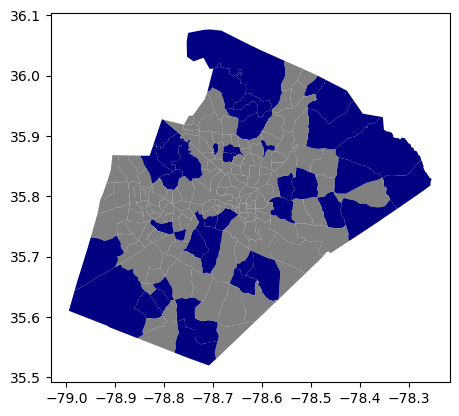

In [ ]:
wake_co.plot(color=wake_co['fillColor'])

wake_co.to_file('./geojson/wake_county_census_tracts.geojson', driver='GeoJSON')

Now, let's add another historic map of Raleigh. Go to https://mapwarper.net/ and put "raleigh" in the search bar. Select "Rectified maps only" and search. 

Look through the maps and find one you want to use. Click on the "Export" tab at the top and copy the link from the "Tiles (Google/OSM scheme):" option.

<!-- https://mapwarper.net/maps/tile/44859/{z}/{x}/{y}.png -->

In [ ]:
# Add this link to the Overlay column to a chapter of your choice
# remember, if the historical map does not overlap with the school for that chapter, 
# we will need to manually zoom out to see it or change our zoom settings



Try adding new images, text, vidoes, and GeoJSON files to different chapters. 
Remember to add the data we are adding to their respective folders.

### Colormaps and GeoJSONs

In [ ]:
from matplotlib import colormaps
# list(colormaps)
# from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

from pylab import cm

In [ ]:
# Set up to visualize the colors you want to use:

# number of classes you need
n_classes = 256
gradient = np.linspace(0, 1, n_classes)
gradient = np.vstack((gradient, gradient))

In [ ]:
# Choose the color ramp you want
colormap_name = 'BuPu'

# Plot the color map
plt.imshow(gradient, aspect='auto', cmap=mpl.colormaps[colormap_name])

In [ ]:
# number of classes you need
n_classes = 10
gradient = np.linspace(0, 1, n_classes)
gradient = np.vstack((gradient, gradient))

# Choose the color ramp you want
colormap_name = 'BuPu'

# Plot the color map
plt.imshow(gradient, aspect='auto', cmap=mpl.colormaps[colormap_name])

#### Exploring colormaps
Check out more details on colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [ ]:
# adapted from matplotlib documentation
def plot_color_gradients(category, cmap_list, gradient):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(8, figh+2.5))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.25 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=16)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=14,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # # Save colormap list for later.
    # cmaps[category] = cmap_list

In [ ]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
                     gradient)

In [ ]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'],
                      gradient)

In [ ]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'],
                      gradient)

#### Get colormap values to use in GeoJSON

In [ ]:
def plot_hex_color_gradients(cmap, rows:int=2, columns:int=5):
    
    # Get list of hexidecimal color values
    cmap_hex_lst = [mpl.colors.rgb2hex(cmap(c)) for c in range(cmap.N)]
    
    # Reorder hex labels in a snake pattern - start with top left, end bottom left
    cmap_hex_lst_reordered = np.reshape(cmap_hex_lst, (rows, columns))
    cmap_hex_lst_reordered[1] = np.flip(cmap_hex_lst_reordered[1], 0)

    # Reorder color values in a snake pattern - start with top left, end bottom left
    cmap_col_reordered = np.reshape(list(range(cmap.N)), (rows, columns))
    cmap_col_reordered[1] = np.flip(cmap_col_reordered[1], 0)


    # Plot
    fig, ax = plt.subplots(figsize=(cmap.N, columns / rows + 1))
    im = ax.imshow(cmap_col_reordered, aspect='auto', cmap=cmap)

    # Loop over data dimensions and create text annotations.
    for i in range(rows):
        if i == 0:
            text_col = 'black'
        else:
            text_col = 'w'
        for j in range(columns):
            text = ax.text(j, i, cmap_hex_lst_reordered[i, j],
                        ha="center", va="center", color=text_col,
                        size=16)
    # Remove axis titles    
    ax.set_axis_off()
    
    # Add name of colormap
    ax.set_title(cmap.name, size = 20)

    # return regular ordered hex color values
    return(cmap_hex_lst)

In [ ]:
cmap = cm.get_cmap('BuPu', 10)
cmap


In [ ]:
cmap_hex_values = plot_hex_color_gradients(cmap)

In [ ]:
cmap_hex_values

In [ ]:
print(
f'''
min: {np.min(wake_co['AWATER'])}
10: {np.percentile(wake_co['AWATER'], 10)}
20: {np.percentile(wake_co['AWATER'], 20)}
30: {np.percentile(wake_co['AWATER'], 30)}
40: {np.percentile(wake_co['AWATER'], 40)}
50: {np.percentile(wake_co['AWATER'], 50)}
60: {np.percentile(wake_co['AWATER'], 60)}
70: {np.percentile(wake_co['AWATER'], 70)}
80: {np.percentile(wake_co['AWATER'], 80)}
90: {np.percentile(wake_co['AWATER'], 90)}
max: {np.max(wake_co['AWATER'])}
''')

In [ ]:
wake_co['fillColor'] = cmap_hex_values[0]

for i in range(cmap.N):
    # print((i+1) * 10)
    print(np.percentile(wake_co['AWATER'], (i+1) * 10))
    print(cmap_hex_values[i])
    wake_co.loc[wake_co['AWATER'] >= np.percentile(wake_co['AWATER'], (i+1) * 10), 'fillColor']  = cmap_hex_values[i]
wake_co


In [ ]:
wake_co.plot(color=wake_co['fillColor'])


In [ ]:
wake_co.to_file('./geojson/wake_co_census_colored_AWATER.geojson', driver='GeoJSON')


In [ ]:
chapter_df.loc[chapter_df['Chapter']=='Wake Technical Community College', 'GeoJSON Overlay'] = 'geojson/wake_co_census_colored_AWATER.geojson'
chapter_df.loc[chapter_df['Chapter']=='Wake Technical Community College', 'GeoJSON Feature Properties'] = 'fillColor:gray;color:white'


In [ ]:
chapter_df.to_csv('./csv/Chapters.csv')